# K Means Clustering Project

## The Data
We will use a data frame with 777 observations on the following 18 variables.

Private A factor with levels No and Yes indicating private or public university

Apps Number of applications received

Accept Number of applications accepted

Enroll Number of new students enrolled

Top10perc Pct. new students from top 10% of H.S. class

Top25perc Pct. new students from top 25% of H.S. class

F.Undergrad Number of fulltime undergraduates

P.Undergrad Number of parttime undergraduates

Outstate Out-of-state tuition

Room.Board Room and board costs

Books Estimated book costs

Personal Estimated personal spending

PhD Pct. of faculty with Ph.D.’s

Terminal Pct. of faculty with terminal degree

S.F.Ratio Student/faculty ratio

perc.alumni Pct. alumni who donate

Expend Instructional expenditure per student

Grad.Rate Graduation rate

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#getting data
df = pd.read_csv('E:/2.PYTHON-ML-BOOTCAMP/resources/17-K-Means-Clustering/College_Data', index_col=0)

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA


**Creating a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.**

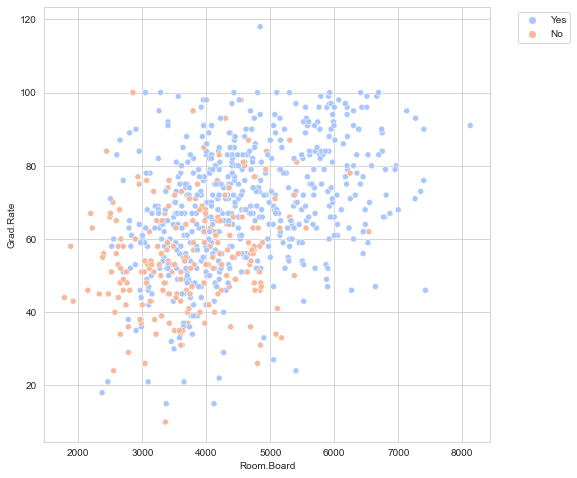

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
sns.scatterplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private', palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

**Creating a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

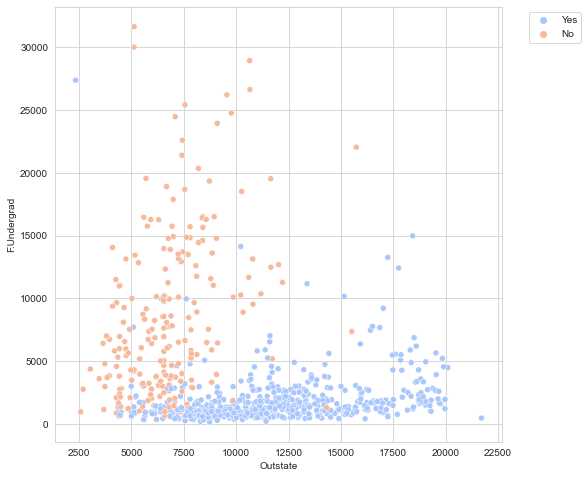

In [7]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Outstate', y='F.Undergrad', data=df, hue='Private', palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

**Creating a stacked histogram showing Out of State Tuition based on the Private column.**

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


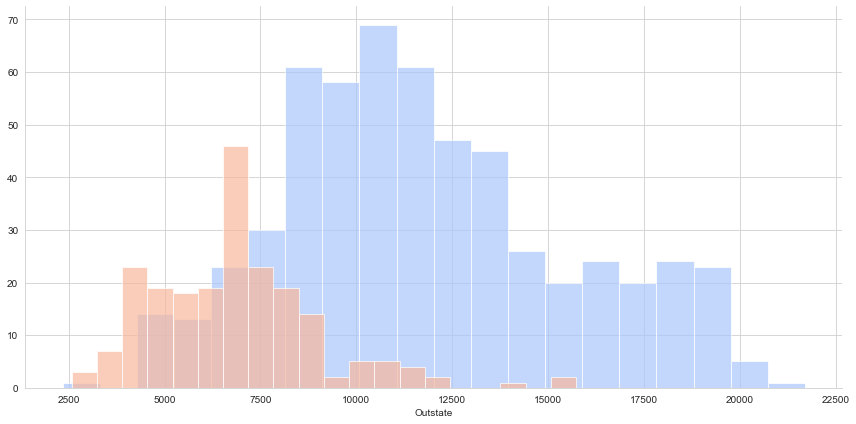

In [8]:
g = sns.FacetGrid(df, hue='Private', palette='coolwarm', size=6, aspect=2)
g= g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

**Creating a similar histogram for the Grad.Rate column.**

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


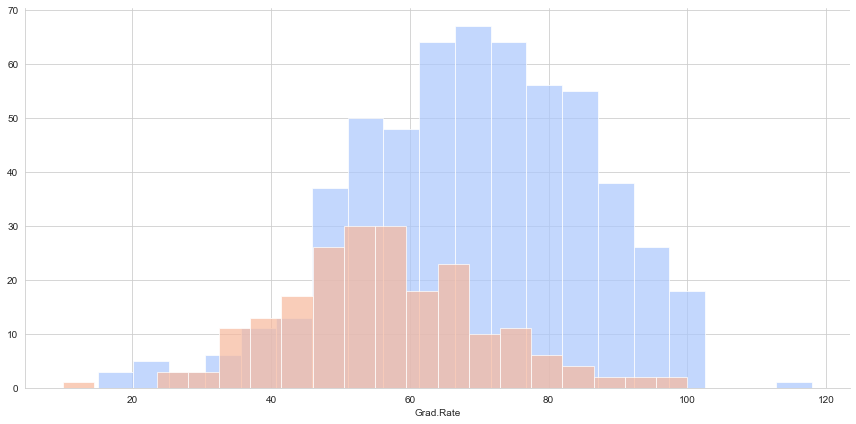

In [9]:
g = sns.FacetGrid(df, hue='Private', palette='coolwarm', size=6, aspect=2)
g= g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

**There seems to be a private school with a graduation rate of higher than 100%. Let's check the name of that school?**

In [10]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


**Setting that school's graduation rate to 100 so it makes sense.**

In [12]:
df['Grad.Rate']['Cazenovia College'] = 100

<ipython-input-12-bc95ac68ab2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grad.Rate']['Cazenovia College'] = 100


In [13]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


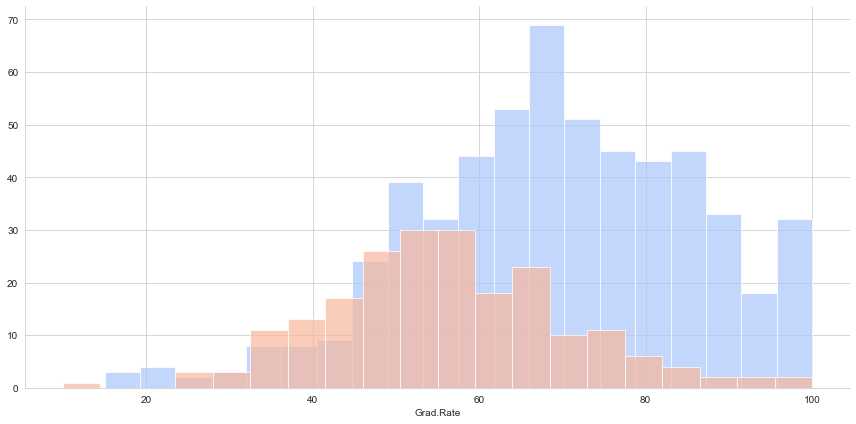

In [14]:
g = sns.FacetGrid(df, hue='Private', palette='coolwarm', size=6, aspect=2)
g= g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

## K Means Cluster Creation

Now it is time to create the Cluster labels!

**Import KMeans from SciKit Learn.**

In [15]:
from sklearn.cluster import KMeans

**Create an instance of a K Means model with 2 clusters.**

In [34]:
model = KMeans(n_clusters=2)

**Fit the model to all the data except for the Private label.**

In [35]:
model.fit(df.drop('Private', axis=1))

KMeans(n_clusters=2)

** What are the cluster center vectors?**

In [36]:
model.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01, 3.14814815e-01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01, 7.93721973e-01]])

## Evaluation

**Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [37]:
def converter(cluster):
    if cluster == 'Yes':
        return 1
    else:
        return 0

In [38]:
df['Cluster']= df['Private'].apply(converter)

In [39]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


**Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
print(confusion_matrix(df['Cluster'], model.labels_))
print('\n')
print(classification_report(df['Cluster'], model.labels_))

[[ 74 138]
 [ 34 531]]


              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

